
Crystal properties

                    CIF file:  /home/spc93/spc_cifs/GGG_sawada_icsd_84874.cif
                     Lattice:  12.383 12.383 12.383 90.00 90.00 90.00
                   All sites:  Gd1, Ga1, Ga2, O1
               Site selected:  Gd1
                 Site vector:  0.125 0.000 0.250
       No. of spacegroup ops:  96
      No. of sym ops at site:  4
 No. of equiv. sites in cell:  24
   No. of pg ops for crystal:  48

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 2.0]
                Site allowed:  No
   Structure factor for site:  0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


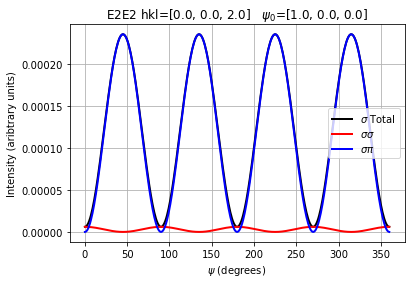

('\nTensor components\n', '\n         Crystal (spherical):  ', array([ 0.598-0.j,  0.   +0.j, -0.   +0.j, -0.   +0.j,  1.   -0.j,
        0.   +0.j, -0.   -0.j, -0.   +0.j,  0.598+0.j]), '\n            Atom (spherical):  ', array([ 0.447-0.j   ,  0.   +0.054j,  0.2  +0.j   , -0.   -0.02j ,
        1.   +0.j   ,  0.   -0.02j ,  0.2  -0.j   , -0.   +0.054j,
        0.447+0.j   ]), '\n  Struct. factor (spherical):  ', array([-0.-0.j, -0.+0.j,  1.+0.j,  0.+0.j,  0.-0.j, -0.+0.j,  1.+0.j,
        0.+0.j, -0.+0.j]), '\n\nCrystal (Cartesian):\n\n', array([[[[19.694-0.j,  0.   +0.j,  0.   -0.j],
         [ 0.   +0.j, -9.847-0.j, -0.   -0.j],
         [ 0.   -0.j, -0.   -0.j, -9.847-0.j]],

        [[ 0.   +0.j, -9.847-0.j, -0.   -0.j],
         [-9.847-0.j, -0.   +0.j, -0.   -0.j],
         [-0.   -0.j, -0.   -0.j, -0.   -0.j]],

        [[ 0.   -0.j, -0.   -0.j, -9.847-0.j],
         [-0.   -0.j, -0.   -0.j, -0.   -0.j],
         [-9.847-0.j, -0.   -0.j, -0.   +0.j]]],


       [[[ 0.   +0.j,

<Figure size 432x288 with 0 Axes>

In [5]:
import TensorScatteringClass as ten
import numpy as np


t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/GGG_sawada_icsd_84874.cif', Site='Gd1');

#hkl, proc , K, Parity = np.array([0,0,2]), 'E1E1', 2, 1
hkl, proc , K, Parity = np.array([0,0,2]), 'E2E2', 4, 1
#hkl, proc , K, Parity = np.array([0,1,1]), 'E1E1', 2, 1
#hkl, proc , K, Parity = np.array([0,1,1]), 'E2E2', 4, 1


name = '%s hkl = (%i, %i, %i) K=%i' % (proc, hkl[0], hkl[1], hkl[2], K)
name = '/home/spc93/tmp/' + name
t.PlotIntensityInPolarizationChannels(proc, lam=1, hkl=hkl, hkln=np.array([1,0,0]), K=K, Time=+1, Parity=Parity, mk=None, lk=None, sk=None, sigmapi='sigma', savefile = name)
t.print_tensors()


#Iss, Isp,Ips, Ipp = t.CalculateIntensityInPolarizationChannels('E2E2', lam=1, hkl=np.array([0,0,0]), hkln=np.array([1,0,0]), psideg = np.arange(0, 360, 25),  K=4, Time=1, Parity=+1, mk=None, lk=None, sk=None)


In [2]:
name
#print '%s '+'sigma'+'.pdf' % name
#'%s '+'sigma'+'.pdf'
print ('%s '+'sigma'+'.pdf') % name

/home/spc93/tmp/E2E2 hkl = (0, 1, 1) K=4 sigma.pdf


In [4]:
t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/GGG_sawada_icsd_84874.cif', Site='Gd1', verbose = False);

def calc_ten(hkl):
    proc_dic = {'E1E1':{'K':2, 'Parity':1},
                'E1E2':{'K':3, 'Parity':-1},
                'E2E2':{'K':4, 'Parity':1}
               }
    lam = 1
    Time = 1
    psideg = np.arange(0, 360, 25)
    hkln = np.array([0.1234, 0.7777, 0.22804969])
    
    dic = {}
    for proc in proc_dic.keys():
        #print proc, lam, hkl, hkln, psideg, proc_dic[proc]['K'], Time, proc_dic[proc]['Parity']
        Iss, Isp,Ips, Ipp = t.CalculateIntensityInPolarizationChannels(proc, lam, hkl, hkln, psideg=psideg, K=proc_dic[proc]['K'], Time=Time, Parity=proc_dic[proc]['Parity'])
        ten_allowed = t.tensor_allowed==1
        sg_allowed = t.gen_scalar_allowed==1
        tensor = max(abs(t.Fs)**2)>0.000001   
        signal = max(Iss**2 + Isp**2 + Ips**2 + Ipp**2)>0.000001
        dic[proc] = {'tensor': tensor, 'signal': signal}
        
    return {'hkl': list(hkl), 'sg_allowed': sg_allowed, 'ten_allowed':ten_allowed, 'E1E1': dic['E1E1'], 'E1E2': dic['E1E2'], 'E2E2': dic['E2E2']}

            
reflist = []
for h in range(7):
    for k in range(7):
        for l in range(7):
            reflist += [[h, k, l]]
reflist.sort(key = lambda x : x[0]**2 + x[1]**2 + x[2]**2)
            

ten_list = []
for hkl in reflist:
    ten_list += [calc_ten(hkl)]

print 'hkl\t\tsg_allowed\tten_allowed\tproc\ttensor\tsignal\tproc\ttensor\tsignal\tproc\ttensor\tsignal'
print
for r in ten_list:
    print r['hkl'],'\t',r['sg_allowed'],'\t\t',r['ten_allowed'],'\t\t', 'E1E1', '\t',r['E1E1']['tensor'],'\t',r['E1E1']['signal'],'\t','E1E2', '\t',r['E1E2']['tensor'],'\t',r['E1E2']['signal'],'\t','E2E2', '\t',r['E2E2']['tensor'],'\t',r['E2E2']['signal']
    

hkl		sg_allowed	ten_allowed	proc	tensor	signal	proc	tensor	signal	proc	tensor	signal

[0, 0, 0] 	True 		True 		E1E1 	False 	False 	E1E2 	False 	False 	E2E2 	True 	False
[0, 0, 1] 	False 		False 		E1E1 	False 	False 	E1E2 	False 	False 	E2E2 	False 	False
[0, 1, 0] 	False 		False 		E1E1 	False 	False 	E1E2 	False 	False 	E2E2 	False 	False
[1, 0, 0] 	False 		False 		E1E1 	False 	False 	E1E2 	False 	False 	E2E2 	False 	False
[0, 1, 1] 	False 		True 		E1E1 	True 	True 	E1E2 	True 	True 	E2E2 	True 	True
[1, 0, 1] 	False 		True 		E1E1 	True 	True 	E1E2 	True 	True 	E2E2 	True 	True
[1, 1, 0] 	False 		True 		E1E1 	True 	True 	E1E2 	True 	False 	E2E2 	True 	True
[1, 1, 1] 	False 		False 		E1E1 	False 	False 	E1E2 	False 	False 	E2E2 	False 	False


In [6]:
t.lattice

[12.3829, 12.3829, 12.3829, 90.0, 90.0, 90.0]